In [178]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [179]:
soildata=pd.read_csv('/kaggle/input/autoirrigationdata/data.csv')


In [180]:
soildata.rename(columns = {'moisture':'Humidity'}, inplace = True)
soildata.rename(columns = {'temp':'Temperature'}, inplace = True)
soildata.rename(columns = {'pump':'Irrigate'}, inplace = True)
print( 'Taille(n_lignes,n_colonnes)of data frame :',soildata.shape)
soildata.head(10)

Taille(n_lignes,n_colonnes)of data frame : (200, 4)


,crop,Humidity,Temperature,Irrigate
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
5,cotton,558,23,1
6,cotton,578,12,1
7,cotton,673,35,1
8,cotton,642,45,1
9,cotton,723,11,1


In [181]:
soildata.describe()

,Humidity,Temperature,Irrigate
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [182]:
soildata['Irrigate'].value_counts()

1    150
0     50
Name: Irrigate, dtype: int64

Text(0.5, 1.0, 'Distribution de l arrosage')

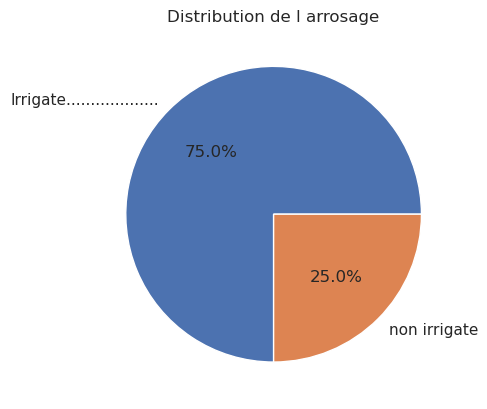

In [183]:
labels=["Irrigate...................","non irrigate"]
y=np.array([150, 50])
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.title('Distribution de l arrosage')

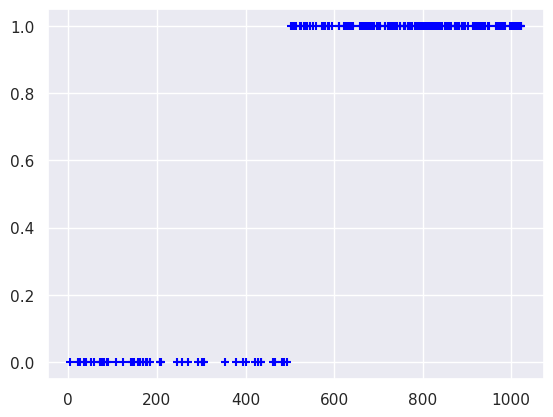

In [184]:
plt.scatter(soildata.Humidity,soildata.Irrigate,marker='+',color='blue')

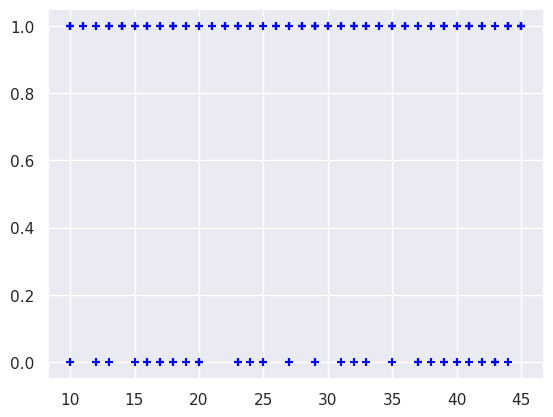

In [185]:
plt.scatter(soildata.Temperature,soildata.Irrigate,marker='+',color='blue')

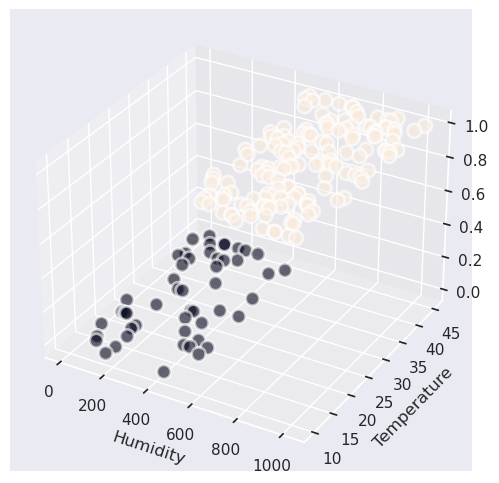

In [208]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(soildata.Humidity, soildata.Temperature, soildata.Irrigate,
           linewidths=2, alpha=.6,
           edgecolor='w',
           s = 100,
           c=soildata.Irrigate)
plt.xlabel("Humidity")
plt.ylabel("Temperature")

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


ValueError: Argument Z must be 2-dimensional.

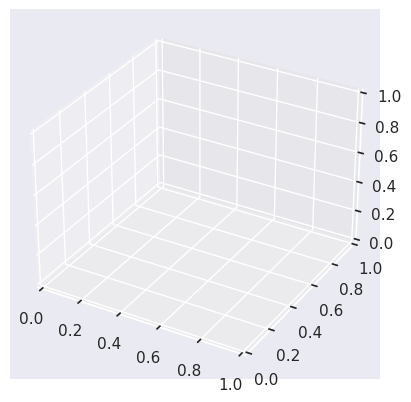

In [202]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = soildata.Humidity, soildata.Temperature, soildata.Irrigate
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='z', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

<AxesSubplot:>

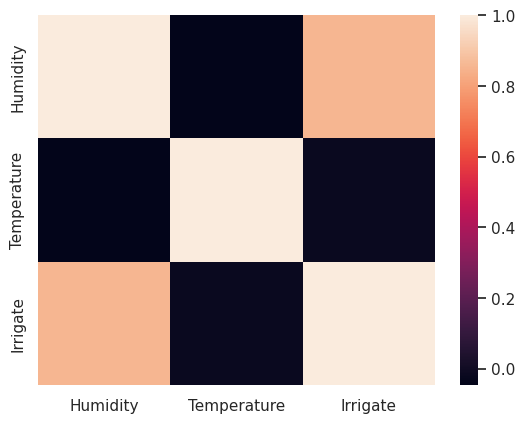

In [187]:
cormat = soildata.corr()
round(cormat,2)
sns.heatmap(cormat)

In [188]:
from sklearn.model_selection import train_test_split 

In [189]:
X = soildata.drop(['Irrigate','crop'], axis=1)
y = soildata['Irrigate']

In [190]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3,stratify=y, random_state=42)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [192]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,TimeDistributed,Conv1D,Flatten
nodes = 400 #try 200 ## for LSTM
learning_rate = 0.001
n_steps = 64
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu', padding="same" , input_shape=(1,n_steps_in, n_features,1))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(256, return_sequences = True, input_shape = (X_train.shape[1], 2)))
model.add(LSTM(128,input_shape = (X_train.shape[1], 2)))
model.add(Dense(2))
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [193]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

0.95 : is the accuracy score
0.9375 : is the precision score
1.0 : is the recall score
0.967741935483871 : is the f1 score


In [194]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[45  0]
 [ 3 12]]


Normalized confusion matrix
[[1.  0. ]
 [0.2 0.8]]


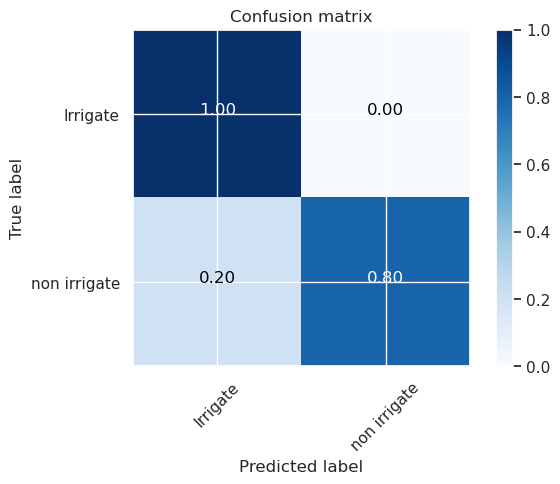

In [209]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Irrigate','non irrigate'],normalize= True,  title='Confusion matrix')

In [196]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        45

    accuracy                           0.95        60
   macro avg       0.97      0.90      0.93        60
weighted avg       0.95      0.95      0.95        60

